In [103]:
import pandas as pd
import numpy as np
import random
import operator
import matplotlib.pyplot as plt

In [104]:
#---------------------------------------------------------------------------------------------------------------- DATA MANAGEMENT ---------------------------------------------------------------------------------------------------------------------------------------




In [105]:
#----------------------------------------------------------------------------------------------------------------- Classes ---------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------- Can be viewed as structs in c --------------------------------------------------------------------------------------------------------------------
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0

            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness
    

In [106]:
#----------------------------------------------------------------------------------------------------------------- Functions ------------------------------------------------------------------------------------------------------------------------

def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    
    return route

def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])

    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
            
    return selectionResults

def matingPool(population, selectionResults):
    matingPool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingPool.append(population[index])

    return matingPool

def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []

    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))

    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])

    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2

    return child


def breedPopulation(matingPool, eliteSize):
    children = []
    length = len(matingPool) - eliteSize
    pool = random.sample(matingPool, len(matingPool))

    for i in range(0, length):
        children.append(matingPool[i])

    for i in range(0, length):
        child = breed(pool[i], pool[len(matingPool)-(i+1)])
        children.append(child)

    return children

def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if (random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))

            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1

    return individual

def mutatePopulation(population, mutationRate):
    mutatedPop = []

    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    
    return mutatedPop

def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print('Iniital distance: ' + str(1 / rankRoutes(pop)[0][1]))

    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)

    
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    print('Iniital distance: ' + str(1 / rankRoutes(pop)[0][1]))
    progress.append(1/ rankRoutes(pop)[0][1])

    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1/ rankRoutes(pop)[0][1])

    print('Final distance: ' + str(1 / rankRoutes(pop)[0][1]))

    plt.plot(progress)
    plt.title('Progress of distance calculation')
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

C:\Users\fredr\AppData\Local\Temp\ipykernel_4760\662608116.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('berlin52.tsp', skiprows = 6, delimiter=r'\s+', names = col_names, usecols=['x','y'], skipfooter=2) #! Seperates the columns by identifying the spaces


[(1465.0,200.0), (830.0,485.0), (560.0,365.0), (605.0,625.0), (945.0,685.0), (1530.0,5.0), (835.0,625.0), (685.0,595.0), (145.0,665.0), (1215.0,245.0), (95.0,260.0), (725.0,370.0), (25.0,185.0), (975.0,580.0), (95.0,260.0), (845.0,655.0), (420.0,555.0), (1220.0,580.0), (795.0,645.0), (945.0,685.0), (1340.0,725.0), (1320.0,315.0), (660.0,180.0), (25.0,230.0), (480.0,415.0), (560.0,365.0), (720.0,635.0), (975.0,580.0), (835.0,625.0), (25.0,185.0), (945.0,685.0), (770.0,610.0), (1740.0,245.0), (1340.0,725.0), (580.0,1175.0), (1220.0,580.0), (660.0,180.0), (1150.0,1160.0), (650.0,1130.0), (700.0,580.0), (475.0,960.0), (95.0,260.0), (725.0,370.0), (720.0,635.0), (770.0,610.0), (1250.0,400.0), (145.0,665.0), (1465.0,200.0), (560.0,365.0), (595.0,360.0), (700.0,580.0)]
51
Iniital distance: 26929.969367167236
Final distance: 22720.008056888673


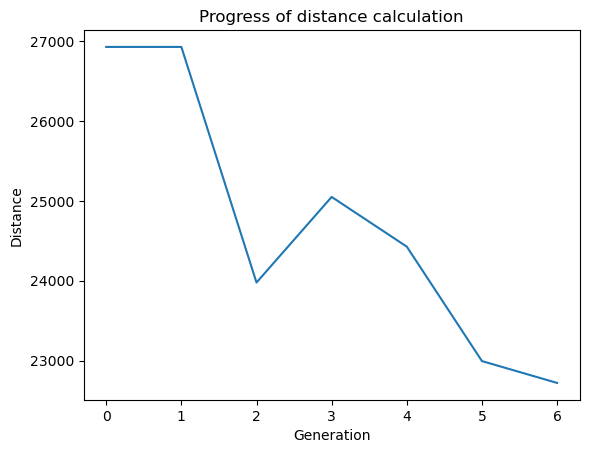

In [108]:
#------------------------------------------------------------------------------------------------- Running the program -----------------------------------------------------------------------------------------------------------------------------------

col_names = ['City Index', 'x', 'y']

df = pd.read_csv('berlin52.tsp', skiprows = 6, delimiter=r'\s+', names = col_names, usecols=['x','y'], skipfooter=2) #! Seperates the columns by identifying the spaces

dataframe_to_list = df.values.tolist()

H  = dataframe_to_list[0][1]

#print(dataframe_to_list)

cityList = []
"""
for i in range(0, len(dataframe_to_list)-1):
    k = random.sample(range(len(dataframe_to_list)-1), 1)


    print(i)

print(len(dataframe_to_list)-1)
print('Made it this far...')

print(k)


"""
for i in range(0, len(dataframe_to_list)-1):
    j = random.randint(0, len(dataframe_to_list)-1)
    
    #print('Hello')
    #print(j)
    #print(type(j))

    cityList.append(City(x=dataframe_to_list[int(j)][0], y = dataframe_to_list[int(j)][1]))

print(cityList)
print(len(cityList))


    

#print(cityList)

geneticAlgorithmPlot(population=cityList, popSize = 100, eliteSize=15, mutationRate=0.01, generations=6)